# Sheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Principal Component Analysis
### (a)

In [2]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    N = data.shape[1]
    data_centered = data @ (np.eye(N) - (1. / N) * np.ones((N, 1)) @ np.ones((1, N)))

    # compute X times X transpose

    cov_matrix = data_centered @ data_centered.T
    
    # compute the eigenvectors and eigenvalues

    eigvalues, eigvectors = np.linalg.eig(cov_matrix)
    
    # sort the eigenvectors by eigenvalue and take the n_components largest ones

    eigvectors = eigvectors[:, np.argsort(-eigvalues)]
    components = eigvectors[:, :n_components].T
    
    # compute X_projected, the projection of the data to the components

    X_projected = components @ data_centered
    
    return components, X_projected  # return the n_components first components and the pca projection of the data


In [ ]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [ ]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)

print("Number of samples in each class: ", np.unique(labels, return_counts=True)[1])

features.shape=(116, 2233), labels.shape=(2233,)
Number of samples in each class:  [999 864 370]


Normalize the data

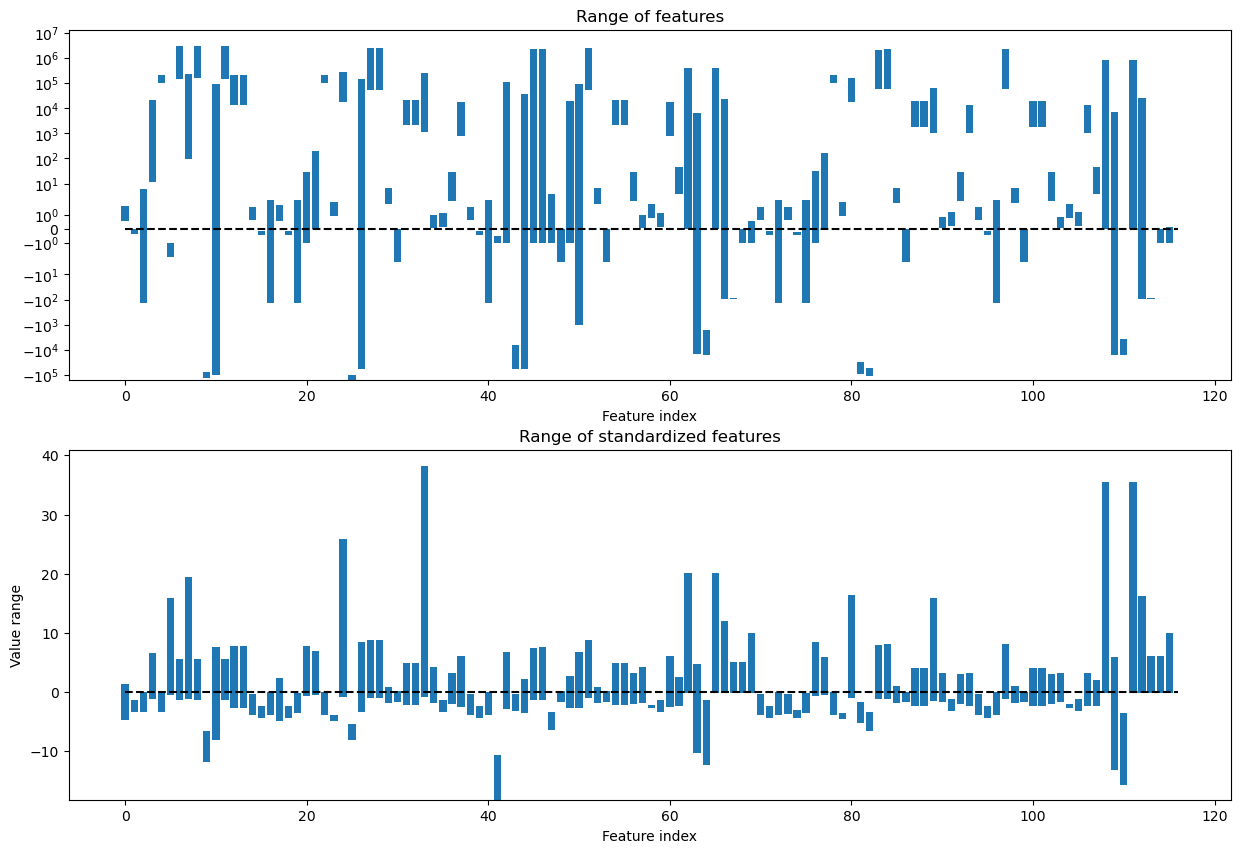

In [ ]:
# TODO: report range of features and normalize the data to zero mean and unit variance

fig, ax = plt.subplots(2, 1)

ax[0].bar(np.arange(features.shape[0]), np.max(features, 1), bottom=np.min(features, 1))
ax[0].set_title("Range of features")
ax[0].set_xlabel("Feature index")
ax[1].set_ylabel("Value range")
ax[0].set_yscale("symlog")
ax[0].plot([0, features.shape[0]], [0, 0], "k--")

mean_matrix = np.mean(features, axis=1).reshape(-1, 1) @ np.ones((1, features.shape[1]))
std_matrix = np.std(features, axis=1).reshape(-1, 1)

features_standardized = (features - mean_matrix) / std_matrix

ax[1].bar(np.arange(features_standardized.shape[0]), np.max(features_standardized, 1), bottom=np.min(features_standardized, 1))
ax[1].set_title("Range of standardized features")
ax[1].set_xlabel("Feature index")
ax[1].set_ylabel("Value range")
ax[1].plot([0, features.shape[0]], [0, 0], "k--")

fig.set_figwidth(15)
fig.set_figheight(10)
plt.show()



### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label. Interpret your results.

In [ ]:
# TODO: apply PCA as implemented in (a)

_, projection = pca(features_standardized, n_components=2)  # apply your implementation


c:\Users\eliza\.conda\envs\mlph\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\eliza\.conda\envs\mlph\lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


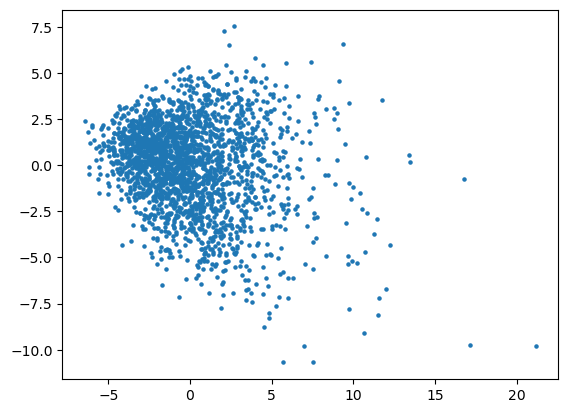

In [ ]:
# TODO: make a scatterplot of the PCA projection
fig, ax = plt.subplots()
ax.scatter(projection[0, :], projection[1, :], s=5)
plt.show()



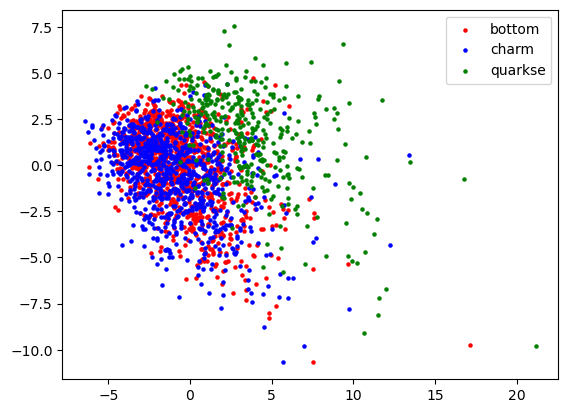

In [ ]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels. Why could it be problematic to scatter the data sorted by labels though?)

fig, ax = plt.subplots()
ax.scatter(projection[0, labels == 0], projection[1, labels == 0], s=5, color='red', label="bottom")
ax.scatter(projection[0, labels == 1], projection[1, labels == 1], s=5, color='blue', label="charm")
ax.scatter(projection[0, labels == 2], projection[1, labels == 2], s=5, color='green', label="quarkse")
plt.legend(loc="upper right")
plt.show()



## 2 Nonlinear Dimension Reduction

In [ ]:
import umap  # import umap-learn, see https://umap-learn.readthedocs.io/

In [ ]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

### (a)

In [ ]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!

reducer = umap.UMAP()

In [ ]:
# TODO: make a scatterplot of the UMAP projection

# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names

### (b)

In [ ]:
for n_neighbors in (2, 4, 8, 15, 30, 60, 100):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    